<center><h2>Two Dimensional Sine-Gordon Solitons</h2></center>
<p>
Two-dimensional soliton solutions of the sine-Gordon equation are found and visualized:
    <p>
        $$\frac{1}{c^2} \frac{\partial^2u}{\partial^2u}-\frac{\partial^2u}{\partial x^2}- \frac{\partial^2 u}{\partial y^2}=\sin u
        $$

0 out of   22
1 out of   22
2 out of   22
3 out of   22
4 out of   22
5 out of   22
6 out of   22
7 out of   22
8 out of   22
9 out of   22
10 out of   22
11 out of   22
12 out of   22
13 out of   22
14 out of   22
15 out of   22
16 out of   22
17 out of   22
18 out of   22
19 out of   22
20 out of   22
21 out of   22
22 out of   22


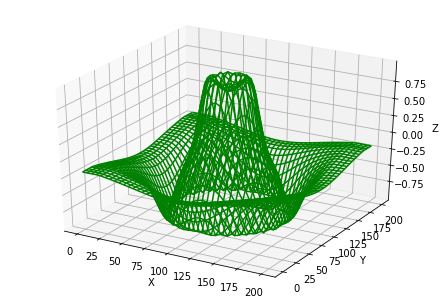

Done


In [2]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

# TwoDsol.java: solves Sine-Gordon equation for 2D soliton

import numpy as np; from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pylab as plt
import math

D = 201; dx = 14./200.; dy = dx;  dt = dx/np.sqrt(2.);
dts = (dt/dx)*(dt/dx)

u = np.zeros((D,D,3),float);  psi = np.zeros((D,D),float)

def initial( u): # initial conditions
    yy = -7.   
    for i in range(0,D ):
      xx = -7. 
      for j in range(0,D ):
           tmp = 3.-np.sqrt(xx*xx + yy*yy)
           u[i][j][0] = 4.*(math.atan(tmp))
           xx = xx + dx
      yy = yy + dy

def solution(nint):    
    time = 0.
    for  m in range(1,D-1):
      for  l in range(1,D-1):
        a2 = u[m+1][l][0] + u[m-1][l][0] + u[m][l+1][0] + u[m][l-1][0]
        tmp = .25*a2 
        u[m][l][1] = 0.5*(dts*a2-dt*dt*np.sin(tmp))
    for  mm in range(1, D-1):        # Borders in second iteration
      u[mm][0][1] = u[mm][1][1] 
      u[mm][D-1][1] = u[mm][D-2][1] 
      u[0][mm][1] = u[1][mm][1]
      u[D-1][mm][1] = u[D-2][mm][1] 
    u[0][0][1] = u[1][0][1]       # Still undefined terms
    u[D-1][0][1] = u[D-2][0][1] 
    u[0][D-1][1] = u[1][D-1][1] 
    u[D-1][D-1][1] = u[D-2][D-1][1] 
    tmp = 0.   
    for  k in range(0, nint+1):    # Following iterations
      print(k, "out of  ",nint)
      for  m in range(1,D-1):  
        for l in range(1, D-1):
          a1 = u[m + 1][l][1]+u[m-1][l][1]+u[m][l+1][1]+u[m][l-1][1]
          tmp = .25*a1 
          u[m][l][2] = -u[m][l][0] + dts*a1-dt*dt*np.sin(tmp)
          u[m][0][2] = u[m][1][2]
          u[m][D-1][2] = u[m][D-2][2]
      for  mm in range(1,D-1):  
        u[mm][0][2] = u[mm][1][2] 
        u[mm][D-1][2] = u[mm][D-2][2] 
        u[0][mm][2] = u[1][mm][2]
        u[D-1][mm][2] = u[D-2][mm][2]
      u[0][0][2] = u[1][0][2]
      u[D-1][0][2] = u[D-2][0][2]
      u[0][D-1][2] = u[1][D-1][2]
      u[D-1][D-1][2] = u[D-2][D-1][2]
      for  l in range(0, D):  # New iterations now old
        for  m in range(0,D):  
           u[l][m][0] = u[l][m][1] 
           u[l][m][1] = u[l][m][2]    
      if (k == nint): 
        for  i in range(0,D, 5):  
          for j in range(0,D, 5): psi[i][j]=np.sin(u[i][j][2]/2)
      time = time + dt

def funcz(u):
    z = psi[X,Y]                        
    return z

initial(u)
time=0.   
xx = np.arange(0,D,5)
yy  =np.arange(0,D,5) 
X, Y = plt.meshgrid(xx, yy)
solution(22)     # Number of time iterations
Z = funcz(psi)
fig = plt.figure()
ax = Axes3D(fig)    
ax.plot_wireframe(X, Y, Z, color = 'g')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
print('Done')